# Convolutional Neural Network

### Importing the libraries

In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,         
    shear_range=0.2,         
    zoom_range=0.2,          
    horizontal_flip=True 
)

training_set = train_datagen.flow_from_directory(
    'C:/Users/SUBHASH REDDY/OneDrive/Desktop/Project - CNN for Image Classification/dataset/training_set',  
    target_size=(64, 64),    
    batch_size=32,           
    class_mode='binary'      
)

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [21]:

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_set = test_datagen.flow_from_directory(
    'C:/Users/SUBHASH REDDY/OneDrive/Desktop/Project - CNN for Image Classification/dataset/test_set',     
    target_size=(64, 64),    
    batch_size=32,           
    class_mode='binary'     
)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [22]:
model = Sequential()

### Step 1 - Convolution

In [23]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))

### Step 2 - Pooling

In [24]:
model.add(MaxPooling2D(pool_size = (2,2)))


### Adding a second convolutional layer

In [25]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

### Step 3 - Flattening

In [26]:

model.add(Flatten())

### Step 4 - Full Connection

In [27]:

model.add(Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [28]:
model.add(Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [29]:
plot_model(model,show_shapes=True,show_layer_names=True)
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

You must install pydot (`pip install pydot`) for `plot_model` to work.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,644,609 (6.27 MB)

 Trainable params: 1,644,609 (6.27 MB)

 Non-trainable params: 0 (0.00 B)

### Training the CNN on the Training set and evaluating it on the Test set

In [30]:

hist = model.fit(
    x=training_set,
    validation_data=test_set,
    epochs=25
)

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 154s 603ms/step - accuracy: 0.5329 - loss: 0.7187 - val_accuracy: 0.6685 - val_loss: 0.6220
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 221ms/step - accuracy: 0.6614 - loss: 0.6108 - val_accuracy: 0.6495 - val_loss: 0.6208
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 58s 232ms/step - accuracy: 0.6903 - loss: 0.5823 - val_accuracy: 0.7270 - val_loss: 0.5497
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 327ms/step - accuracy: 0.7106 - loss: 0.5549 - val_accuracy: 0.7450 - val_loss: 0.5292
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 183ms/step - accuracy: 0.7379 - loss: 0.5237 - val_accuracy: 0.7660 - val_loss: 0.4897
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 170ms/step - accuracy: 0.7530 - loss: 0.4986 - val_accuracy: 0.7570 - val_loss: 0.4882
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 170ms/step - accuracy: 0.7642 - loss: 0.4861 - val_accuracy: 0.7790 - val_loss: 0.4686
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 176ms/step - accuracy: 0.7781 - loss: 

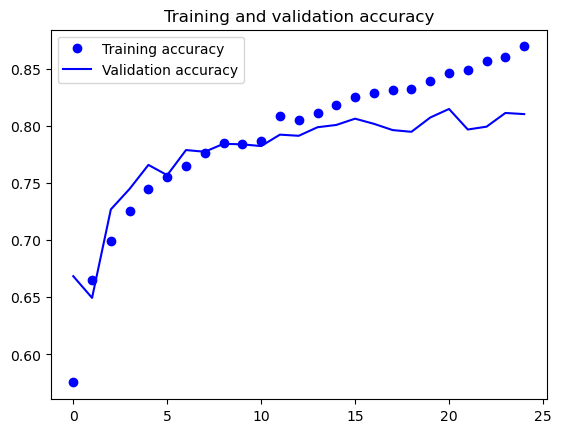

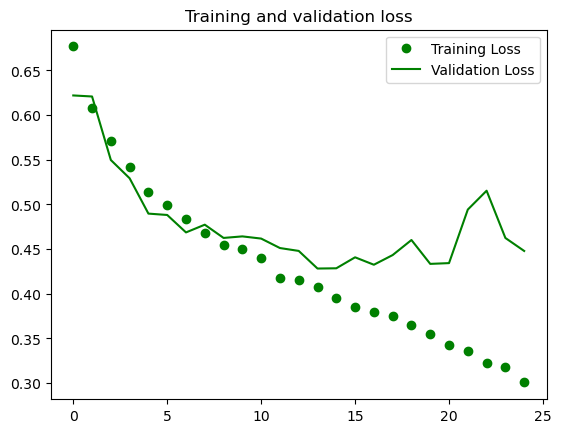

In [31]:

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Part 4 - Making a single prediction

In [33]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

image_paths = [
    'C:/Users/SUBHASH REDDY/OneDrive/Desktop/Project - CNN for Image Classification/dataset/single_prediction/cat_or_dog_1.jpg',
    'C:/Users/SUBHASH REDDY/OneDrive/Desktop/Project - CNN for Image Classification/dataset/single_prediction/cat_or_dog_2.jpg'
]

original_images = []
predictions = []

for img_path in image_paths:
   
    original_img = image.load_img(img_path, target_size=(64, 64))
    original_images.append(original_img)


    img_array = image.img_to_array(original_img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /= 255.0  
    
    result = model.predict(img_array)
    predictions.append(result[0][0]) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


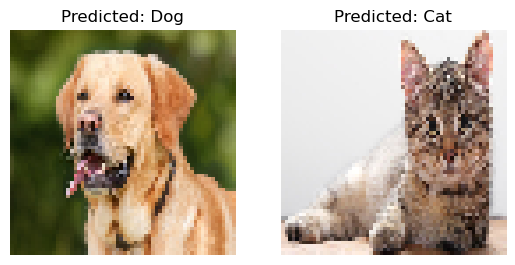

In [34]:
for i, (original_img, prediction) in enumerate(zip(original_images, predictions)):
    plt.subplot(1, len(original_images), i + 1)  
    plt.imshow(original_img)
    label = "Dog" if prediction > 0.5 else "Cat"
    plt.title(f"Predicted: {label}")
    plt.axis('off')

plt.show()